## Data Visualization using Pyspark and Pandas

Checking Package List

In [2]:
pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        21.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.

 Initialising Spark

In [3]:
import findspark
findspark.init()

 Importing Libraries

In [4]:
import os
import pandas as pd
import matplotlib

Creating Spark Session

In [5]:
from pyspark.sql import SparkSession

In [6]:
from pyspark.sql.functions import *


In [7]:
spark = SparkSession.builder.appName("nifty").getOrCreate()

In [8]:
spark.catalog.clearCache()

In [9]:
os.path

<module 'ntpath' from 'c:\\Users\\Rahul\\anaconda3\\lib\\ntpath.py'>

Reading file from local machine and storing it into a dataframe

In [10]:
df= spark.read.format('csv').option('header','true').option('inferSchema','true').load('../niftyDataPoints/nifty50_2007.csv')

In [11]:
df.show()

+----------+-------+-------+-------+------+
|      Date|   Open|   High|    Low| Close|
+----------+-------+-------+-------+------+
|31-12-2007| 6095.0|6167.75| 6095.0|6138.6|
|28-12-2007|6079.55| 6098.6| 6021.9|6079.7|
|27-12-2007| 6069.0|6110.85| 6060.2|6081.5|
|26-12-2007|5988.45|6085.25|5988.45|6070.7|
|24-12-2007| 5771.3|6001.05| 5771.3|5985.1|
|20-12-2007|5751.75| 5799.5|5742.75|5766.5|
|19-12-2007|5730.25| 5840.8| 5676.7|5751.1|
|18-12-2007| 5777.6| 5874.6| 5710.6|5742.3|
|17-12-2007|6037.95|6039.95| 5740.6|5777.0|
|14-12-2007| 6056.2|6078.55|6015.05|6047.7|
|13-12-2007|6159.25| 6185.4| 6040.4|6058.1|
|12-12-2007|6067.05|6175.65|6005.45|6159.3|
|11-12-2007| 5960.4| 6111.2| 5960.4|6097.2|
|10-12-2007| 5974.0| 6015.3|5923.35|5960.6|
|07-12-2007| 5963.6| 6042.1| 5894.8|5974.3|
|06-12-2007|5941.05|6027.05| 5919.8|5954.7|
|05-12-2007| 5861.9| 5949.3|5859.95|5940.0|
|04-12-2007| 5870.2|5897.25| 5840.3|5858.3|
|03-12-2007|5765.45| 5878.8| 5754.6|5865.0|
|30-11-2007| 5633.9|5782.55|5632

In [12]:
df.count()

249

In [13]:
df.tail(1)

[Row(Date='02-01-2007', Open=3966.25, High=4016.65, Low=3964.95, Close=4007.4)]

In [14]:
df.head()

Row(Date='31-12-2007', Open=6095.0, High=6167.75, Low=6095.0, Close=6138.6)

In [15]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)



In [16]:
df.columns

['Date', 'Open', 'High', 'Low', 'Close']

In [17]:
df = df.select(to_date(col('Date'), "dd-MM-yyyy").alias("Date_Formatted"),*df.columns[1:])

Creating Temp View of the dataframe for transformation using SQL

In [18]:
df.createOrReplaceTempView("NIFTY")

In [19]:
# df.filter("Date_Formatted == '2007-06-29'").show()         for filtering out dates

In [20]:
mysql = '''
SELECT *
FROM NIFTY
WHERE Date_Formatted BETWEEN '2007-01-01' AND '2007-06-30' 
ORDER BY Date_Formatted ASC'''

In [21]:
df_fh = spark.sql(mysql)

In [22]:
df_fh.show()

+--------------+-------+-------+-------+------+
|Date_Formatted|   Open|   High|    Low| Close|
+--------------+-------+-------+-------+------+
|    2007-01-02|3966.25|4016.65|3964.95|4007.4|
|    2007-01-03| 4007.7| 4029.8| 3985.0|4024.0|
|    2007-01-04| 4027.3| 4041.0| 3979.8|3988.8|
|    2007-01-05|3990.15|4011.45|3969.65|3983.4|
|    2007-01-08| 3983.3|3987.45| 3913.0|3933.4|
|    2007-01-09| 3933.3|3963.75|3890.75|3911.4|
|    2007-01-10|3910.95|3911.95| 3841.7|3850.3|
|    2007-01-11|3852.15| 3953.1| 3833.6|3942.2|
|    2007-01-12|3944.55|4059.15|3944.55|4052.4|
|    2007-01-15|4052.85|4099.65| 4052.4|4078.4|
|    2007-01-16| 4090.7|4107.45| 4067.9|4080.5|
|    2007-01-17| 4084.9|4096.75|4071.55|4076.4|
|    2007-01-18| 4075.2|4140.25| 4075.2|4109.0|
|    2007-01-19| 4126.0|4137.15|4058.35|4090.1|
|    2007-01-22| 4089.6| 4114.5|4069.95|4102.4|
|    2007-01-23|4102.65| 4105.1|4056.45|4066.1|
|    2007-01-24| 4066.6|4098.25|4065.75|4089.9|
|    2007-01-25|4092.05|4157.95| 4090.1|

Storing the result to pandas df for analysis

In [23]:
pd_df = df_fh.toPandas()

In [31]:
# start = open(first_record)
# low_f = low(Date>= '01-01-2007' AND Date<= '30-06-2007')
# high_f = high(Date>= '01-01-2007' AND Date<= '30-06-2007')
# end = close(last_record)

In [26]:
start = df_fh.collect()[0]['Open']

In [27]:
end = df_fh.collect()[-1]["Close"]

In [28]:
df_fh.select([max("High")])

DataFrame[max(High): double]

In [29]:
pd

<module 'pandas' from 'c:\\Users\\Rahul\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

<AxesSubplot:>

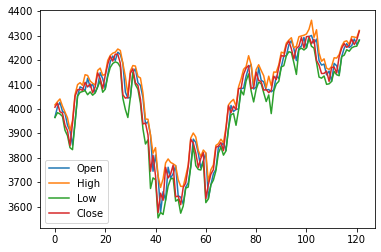

In [30]:
pd_df.plot()